<a href="https://colab.research.google.com/github/atlascosmos/atlascosmos.github.io/blob/main/Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%%shell
jupyter nbconvert --to html "/content/Project_6.ipynb"

[NbConvertApp] Converting notebook /content/Project_6.ipynb to html
[NbConvertApp] Writing 399637 bytes to /content/Project_6.html


# Project 6: Advanced Text Analysis with SpaCy

### Overview

In this project, we will enhance our text analysis techniques by applying proper data pre-processing to extract more meaningful information from literary texts. We'll continue working with the first two chapters of "Pride and Prejudice" but will implement advanced text cleaning methods using the SpaCy library to obtain more insightful word frequency results.

### Project Objectives

*   Apply proper text pre-processing techniques to extract
meaningful words

*   Use SpaCy to clean and normalize text data
*   Identify the 15 most frequently used meaningful words in a text

*   Analyze how pre-processing affects text analysis results
*   Apply the same techniques to a text of your choice

### Part 0: Text analysis without text cleaning (Lab6)

#### Loading Data

We will fetch the first two chapters of Jane Austen's Pride and Prejudice from [Project Gutenberg](https://www.gutenberg.org/ebooks/1342)


#### Function to fetch data

In [ ]:
def fetch_text(raw_url):
  import requests
  from pathlib import Path
  import hashlib

  CACHE_DIR = Path("cs_110_content/text_cache")
  CACHE_DIR.mkdir(parents=True, exist_ok=True)

  def _url_to_filename(url):
    url_hash = hashlib.sha1(url.encode("utf-8")).hexdigest()[:12]
    return CACHE_DIR / f"{url_hash}.txt"

  cache_path = _url_to_filename(raw_url)

  SUCCESS_MSG = "✅ Text fetched."
  FAILURE_MSG = "❌ Failed to fetch text."
  try:
    if not cache_path.exists():
      response = requests.get(raw_url, timeout=10)
      response.raise_for_status()
      text_data = response.text
      cache_path.write_text(text_data, encoding="utf-8")
    print(SUCCESS_MSG)
    return cache_path.read_text(encoding="utf-8")

  except Exception as e:
    print(FAILURE_MSG)
    print(f"Error: {e}")
    return ""

#### Save the text in a variable

In [ ]:
PRIDE_PREJUDICE_URL = "https://gist.githubusercontent.com/goodbadwolf/8514e63776c1e9717d844ea4ee407739/raw/fdc87a64fd18e6ddb01ce8d758f8f2de8d03e163/pride_prejudice_excerpt.txt"

pride_prejudice_text = fetch_text(PRIDE_PREJUDICE_URL)

#### Statistics about the data

In [ ]:
def print_text_stats(text):
  num_chars = len(text)

  lines = text.splitlines()
  num_lines = len(lines)

  num_words = 0
  for line in lines:
    words_in_line = line.split()
    num_words_in_line = len(words_in_line)
    num_words += num_words_in_line

  print(f"Number of characters: {num_chars}")
  print(f"Number of lines: {num_lines}")
  print(f"Number of words: {num_words}")

print_text_stats(pride_prejudice_text)

In [ ]:
def get_word_counts(text):
  word_counts = {}
  lines = text.splitlines()
  for line in lines:
    words = line.split()
    for word in words:
      word = word.lower()
      if word in word_counts:
        word_counts[word] += 1
      else:
        word_counts[word] = 1
  return word_counts

word_counts = get_word_counts(pride_prejudice_text)
print(word_counts)

In [ ]:
# prompt: Make a new Code Cell below and use Gemini to create a new function called print_top_10_frequent_words that will call the above get_word_counts() and print only the top 10 frequent words.

import operator

def print_top_10_frequent_words(text):
    word_counts = get_word_counts(text)
    sorted_word_counts = dict(sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True))
    top_10_words = list(sorted_word_counts.items())[:10]  # Get the top 10 words and counts
    for word, count in top_10_words:
        print(f"{word}: {count}")

print_top_10_frequent_words(pride_prejudice_text)

### Part 1: Analyzing "Pride and Prejudice" with Pre-processing

In our previous lab, we simply counted word frequencies without any sophisticated pre-processing, resulting in common but uninformative words (like "the", "and", "to") dominating our results.

You will use SpaCy, a powerful Natural Language Processing library, to perform these operations. SpaCy provides pre-trained models that can handle tokenization, stop word removal, and lemmatization automatically.





In [ ]:
# install spacy library
#!pip install spacy (uncomment it to install)

In [ ]:
# bring the spacy library into scope
import spacy

In [ ]:
# Load a SpaCy model
nlp = spacy.load('en_core_web_sm')

Explanation:

spacy: This is the spaCy library, a popular and efficient NLP library in Python.

load(): This function loads a pre-trained NLP model.

'en_core_web_sm': This is the name of the small English-language model. It's a lightweight model that includes:

*   Tokenization (splitting text into words, punctuation, etc.)

*  Part-of-speech (POS) tagging

*  Named entity recognition (NER) etc

nlp: This variable now holds the loaded model.

In [ ]:
def word_tokenization_normalization(text):

    text = text.lower() # lowercase
    doc = nlp(text)     # loading text into model

    words_normalized = []
    for word in doc:
        if word.text != '\n' \
        and not word.is_stop \
        and not word.is_punct \
        and not word.like_num \
        and len(word.text.strip()) > 2:
            word_lemmatized = str(word.lemma_)
            words_normalized.append(word_lemmatized)

    return words_normalized

#### TODO

1. Use "Explain Code" AI feature to understand what this function, *word_tokenization_normalization(text)* does and write a short summary of about what it does. You may use bullet points. (Please create another text cell under this cell to write the summary.)

I highlighted def word_tokenization_normalization(text) which is the Python keyword used to define a new function. The definition lets the user clearly understand that I am tokenizing and normalizing the text input. The function will accept 1 input, which will be expected to be in text format, and the parameter assigned to this task is called text. The line sets up a resuable block of code that will operate on some text data and when I invoke the function in the program.

#### TODO

2. Use this function to get meaningful words from pride_prejudice_text. All you need to do is call the function with the correct input text. (Please create a code cell under this cell to accomplish it.)

In [ ]:
import spacy
import operator

# Load the SpaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess and lemmatize text
def preprocess_text(text):
    text = text.lower()
    doc = nlp(text)

    words = [
        token.lemma_  # Get the word's base form (lemma)
        for token in doc
        if not token.is_stop  # Exclude stop words
        and not token.is_punct  # Exclude punctuation
        and not token.like_num  # Exclude numbers
        and len(token) > 2  # Exclude short words
    ]
    return words


# Function to count word frequencies
def count_word_frequencies(words):
    word_frequencies = {}
    for word in words:
        word_frequencies[word] = word_frequencies.get(word, 0) + 1
    return word_frequencies

# Function to get the top N frequent words
def get_top_words(word_frequencies, num_words=15):  # Default is 15
    sorted_frequencies = sorted(
        word_frequencies.items(), key=operator.itemgetter(1), reverse=True
    )
    return sorted_frequencies[:num_words]

# Assuming you have the 'pride_prejudice_text' variable containing the text
pride_prejudice_words = preprocess_text(pride_prejudice_text)
pride_prejudice_word_frequencies = count_word_frequencies(pride_prejudice_words)
top_words = get_top_words(pride_prejudice_word_frequencies)

# Print the top words
print("Top Meaningful Words in Pride and Prejudice:")
for word, frequency in top_words:
    print(f"{word}: {frequency}")

#### TODO

3. Make a new Code Cell below and use Gemini to create a new function called *create_word_frequency_dict* from the result you got from the previous task. This function should return a word frequency dictionary, meaning this is a fruitful function.

In [ ]:
import spacy
import operator

# Load the SpaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess and lemmatize text (same as before)
def preprocess_text(text):
    text = text.lower()
    doc = nlp(text)
    words = [
        token.lemma_
        for token in doc
        if not token.is_stop
        and not token.is_punct
        and not token.like_num
        and len(token) > 2
    ]
    return words

# New function to create the word frequency dictionary
def create_word_frequency_dict(text):

    words = preprocess_text(text)  # Preprocess the text
    word_frequencies = {}
    for word in words:
        word_frequencies[word] = word_frequencies.get(word, 0) + 1
    return word_frequencies  # Return the word frequency dictionary

# Example usage (assuming 'pride_prejudice_text' is loaded):
pride_prejudice_word_frequencies = create_word_frequency_dict(pride_prejudice_text)
print(pride_prejudice_word_frequencies)

#### TODO

4. Make a new Code Cell below and use Gemini to create a new function called *print_top_words* to print out the result as shown below (This is just a print function):

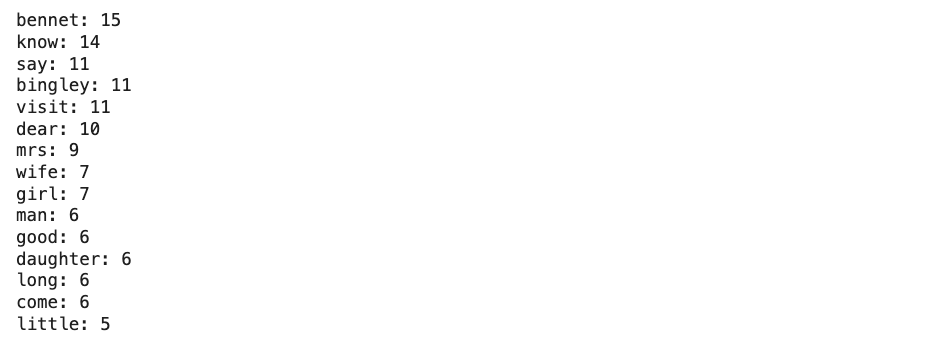

In [ ]:
def print_top_words(word_frequencies, num_words=15):

    top_words = get_top_words(word_frequencies, num_words)  # Get top words

    print(f"Top {num_words} Meaningful Words:")
    for word, frequency in top_words:
        print(f"{word}: {frequency}")

### Part 2: Text Analysis of your choice with pre-processing

For the second part of the project, you will:

* Choose another text that interests you (a novel, article, speech, etc.) (You should make another copy of this colab file and change the name to CS110_Project6_Part2.ipynb)
* Produce 10 to 15 most frequrently used words without text preprocessing
* Apply the same pre-processing steps using SpaCy
* Identify the 15 most frequently used meaningful words
* Write a 1-2 paragraph analysis of what these words reveal about the text's content and themes, and why we need text pre-processing now that you have worked on at least two sets of text

In [ ]:
def fetch_text(raw_url):
  import requests
  from pathlib import Path
  import hashlib

  CACHE_DIR = Path("cs_110_content/text_cache")
  CACHE_DIR.mkdir(parents=True, exist_ok=True)

  def _url_to_filename(url):
    url_hash = hashlib.sha1(url.encode("utf-8")).hexdigest()[:12]
    return CACHE_DIR / f"{url_hash}.txt"

  cache_path = _url_to_filename(raw_url)

  SUCCESS_MSG = "✅ Text fetched."
  FAILURE_MSG = "❌ Failed to fetch text."
  try:
    if not cache_path.exists():
      response = requests.get(raw_url, timeout=10)
      response.raise_for_status()
      text_data = response.text
      cache_path.write_text(text_data, encoding="utf-8")
    print(SUCCESS_MSG)
    return cache_path.read_text(encoding="utf-8")

  except Exception as e:
    print(FAILURE_MSG)
    print(f"Error: {e}")
    return ""

In [ ]:
import requests

def fetch_text(url):

  try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    return response.text
  except requests.exceptions.RequestException as e:
    print(f"Error fetching text from {url}: {e}")
    return None

alice_in_wonderland_url = "https://www.gutenberg.org/cache/epub/11/pg11.txt"
alice_in_wonderland_text = fetch_text(alice_in_wonderland_url)

In [ ]:
import requests
import operator

def fetch_text(url):

    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching text from {url}: {e}")
        return None

def get_word_counts(text):

    word_counts = {}
    words = text.lower().split()  # Convert to lowercase and split into words
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1
    return word_counts

def print_top_words(word_counts, num_words=15):  # Default to 15 words

    sorted_word_counts = dict(sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True))
    top_words = list(sorted_word_counts.items())[:num_words]
    for word, count in top_words:
        print(f"{word}: {count}")

# Fetch the text from the URL
alice_in_wonderland_url = "https://www.gutenberg.org/cache/epub/11/pg11.txt"
alice_in_wonderland_text = fetch_text(alice_in_wonderland_url)

# Check if the text was fetched successfully
if alice_in_wonderland_text:
    word_counts = get_word_counts(alice_in_wonderland_text)
    print_top_words(word_counts)  # Print top 15 words by default
else:
    print("Failed to fetch text.")

In [ ]:
import requests
import operator
import spacy

# Load the SpaCy English language model
nlp = spacy.load("en_core_web_sm")

def fetch_text(url):
    """
    Fetches text from a URL and returns it as a string.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching text from {url}: {e}")
        return None

def preprocess_text(text):
    """
    Preprocesses the text using SpaCy.
    """
    doc = nlp(text.lower())  # Convert to lowercase and process with SpaCy
    words = [
        token.lemma_  # Get the word's base form (lemma)
        for token in doc
        if not token.is_stop  # Exclude stop words
        and not token.is_punct  # Exclude punctuation
        and not token.like_num  # Exclude numbers
        and len(token) > 2  # Exclude short words
    ]
    return words

def get_word_counts(words):
    """
    Counts the frequency of each word in a list of words.
    """
    word_counts = {}
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1
    return word_counts

def print_top_words(word_counts, num_words=15):  # Default to 15 words
    """
    Prints the top N most frequent words.
    """
    sorted_word_counts = dict(sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True))
    top_words = list(sorted_word_counts.items())[:num_words]
    for word, count in top_words:
        print(f"{word}: {count}")

# Fetch the text from the URL
alice_in_wonderland_url = "https://www.gutenberg.org/cache/epub/11/pg11.txt"
alice_in_wonderland_text = fetch_text(alice_in_wonderland_url)

# Check if the text was fetched successfully
if alice_in_wonderland_text:
    words = preprocess_text(alice_in_wonderland_text)
    word_counts = get_word_counts(words)
    print_top_words(word_counts)
else:
    print("Failed to fetch text.")

In [ ]:
import requests
import operator
import spacy

# Load the SpaCy English language model
nlp = spacy.load("en_core_web_sm")

# ... (fetch_text, preprocess_text functions remain the same)

def get_word_counts(words):
    """
    Counts the frequency of each word in a list of words, excluding "project" and "gutenberg".
    """
    word_counts = {}
    for word in words:
        if word not in ["project", "gutenberg"]:  # Omit these words
            word_counts[word] = word_counts.get(word, 0) + 1
    return word_counts

# ... (print_top_words function remains the same)

# Fetch the text from the URL
alice_in_wonderland_url = "https://www.gutenberg.org/cache/epub/11/pg11.txt"
alice_in_wonderland_text = fetch_text(alice_in_wonderland_url)

# Check if the text was fetched successfully
if alice_in_wonderland_text:
    words = preprocess_text(alice_in_wonderland_text)
    word_counts = get_word_counts(words)  # Use the modified get_word_counts
    print_top_words(word_counts, num_words=15)
else:
    print("Failed to fetch text.")

Write a 1-2 paragraph analysis of what these words reveal about the text's content and themes, and why we need text pre-processing now that you have worked on at least two sets of text:



Write a 1-2 paragraph analysis of what these words reveal about the text's content and themes, and why we need text pre-processing now that you have worked on at least two sets of text:

Text analysis specific to the example of my own text of Alice's Adventures in Wonderland needed refinement from the inital function which was asking for the most frequent words from the text. The secondary code gathered the top 15 words that were the most prevalent in the book, which included project and guttenburg, in which were listed and not even in then book! It was funny to see that the computer's logic did exactly what I told it to do, though it required an additional step. To find out the most important words to convey the context of the story was written by ommitting the words such as project and guttenburg, the sponser of the link for the free texts to allow queen and alice to appear.

In conclusion; the further the analysis or specified funcitons that we program into the function through text will reveal it's content and themes which is important for text pre-processing, especially working with multiple text-sets. If I was to sit there with the book it would take me forever to gather the top 15 words, but here we code for the computer to find the keywords, text and descriptive language.